# 데이터 EDA

In [1]:
import sys

from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [2]:
# 경로설정

CWD = Path.cwd()
WORKSPACE_PATH = CWD.parent
COMMON_PATH = WORKSPACE_PATH / 'common'
DATA_PATH = WORKSPACE_PATH / 'data'
FONT_PATH = COMMON_PATH / 'fonts' / 'NanumGothic.ttf'

In [3]:
font_prop = font_manager.FontProperties(fname=FONT_PATH)
rc('font', family=font_prop.get_name())

In [4]:
sys.path.append(str(COMMON_PATH))

In [5]:
import fn_loader as fn
import fn_config as fncfg

## Load data

In [6]:
# loader 생성 (데이터 로드 + multi index로 전처리)
pricevolume1 = fn.FnDataLoader('DBGAPS2024_pricevolume.xlsx') 

In [7]:
pricevolume1.dataguide_df.columns.levels[0]

Index(['shortterm', 'usd', 'usdinv', 'kodexinv', 'oil', 'gold', 'hybond',
       'midbond', '10y', 'csi300', 'nikkei', 'euro50', 'sp500', 'kosdaq150',
       'kodex200'],
      dtype='object')

In [8]:
pricevolume1.dataguide_df.columns.levels[1]

Index(['return', 'adjopen', 'adjhigh', 'adjlow', 'adjclose', 'moneyvolume'], dtype='object')

In [9]:
sid_list = np.array(pricevolume1.get_universe())
sid_list

array(['shortterm', 'usd', 'usdinv', 'kodexinv', 'oil', 'gold', 'hybond',
       'midbond', '10y', 'csi300', 'nikkei', 'euro50', 'sp500',
       'kosdaq150', 'kodex200'], dtype=object)

In [10]:
pricevolume1.get_datafields()

Index(['return', 'adjopen', 'adjhigh', 'adjlow', 'adjclose', 'moneyvolume'], dtype='object')

In [11]:
# 원하는 데이터를 2d 형태로 로드 (default로 nan 제거)
return_df = pricevolume1.get_data('return') # 
return_df.head() # Nikkei225랑 코스닥150이 nan이라 원래 2015-01-01부턴데 2016-03-04부터 시작

,shortterm,usd,usdinv,kodexinv,oil,gold,hybond,midbond,10y,csi300,nikkei,euro50,sp500,kosdaq150,kodex200
Date,,,,,,,,,,,,,,,
2016-03-04,0.00,-0.96,0.92,-0.12,1.27,1.83,0.37,-0.20,-0.19,0.42,0.19,-0.46,0.43,0.28,0.02
2016-03-07,0.00,-0.36,0.19,-0.24,4.58,-0.21,0.37,0.17,0.00,0.48,-0.24,-0.05,0.06,-0.51,0.21
2016-03-08,-0.01,0.45,-0.43,0.79,0.93,0.67,0.05,0.00,0.29,-0.89,-0.48,-0.05,-0.11,0.09,-0.70
2016-03-09,0.02,0.97,-0.82,-0.42,-1.45,-1.07,-0.05,-0.14,-0.05,-0.35,-1.00,-0.57,-0.21,0.60,0.43
2016-03-10,-0.01,-1.08,1.12,-0.73,1.74,-0.46,-0.10,0.19,-0.10,0.21,1.16,0.10,0.17,0.55,0.92


## 누적수익률

In [21]:
cum_return_df = (1 + return_df / 100).cumprod() - 1

In [22]:
cum_return_without_inverse_df =  cum_return_df[[col for col in cum_return_df.columns if 'inv' not in col]].copy()
cum_return_without_inverse_df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\chlje\AppData\Local\Temp\ipykernel_32380\1016612083.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # Adjust layout to make room for the legend
c:\Users\chlje\anaconda3\envs\sandbox311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


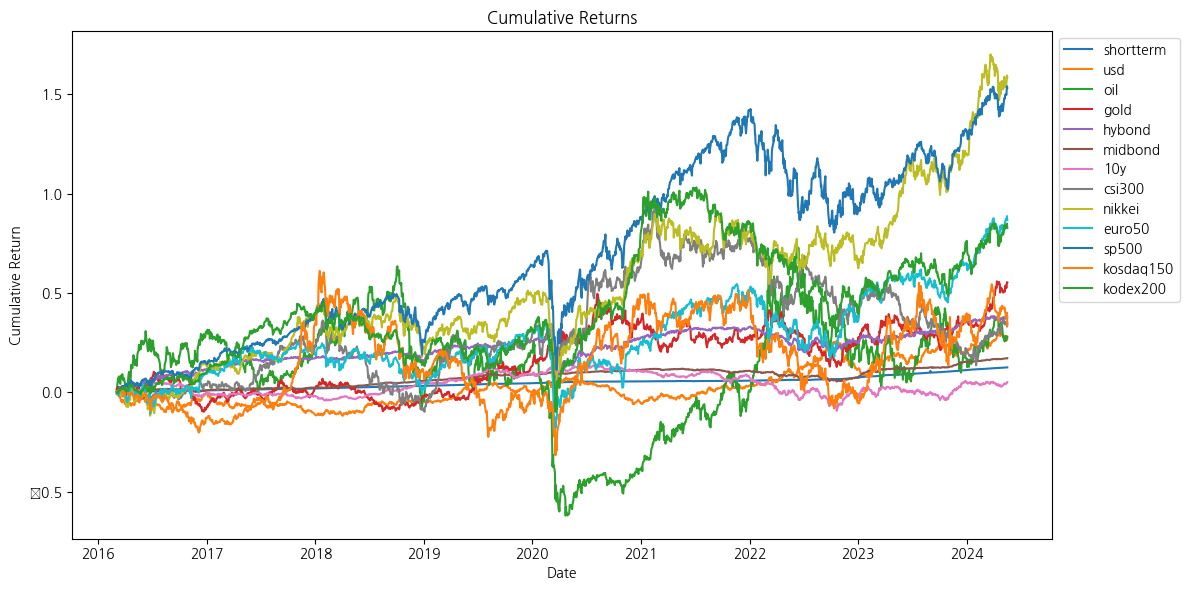

In [23]:
# Plot cumulative returns using matplotlib
plt.figure(figsize=(12, 6))  # Increase figure size

for column in cum_return_without_inverse_df.columns:
    plt.plot(cum_return_without_inverse_df.index, cum_return_without_inverse_df[column], label=column)

# Adjust the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside the plot

# Add title and labels if needed
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

### portfolio의 variance를 time series로 보는 것이 더 보기 좋을 듯. 

C:\Users\chlje\AppData\Local\Temp\ipykernel_32380\3875726319.py:21: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


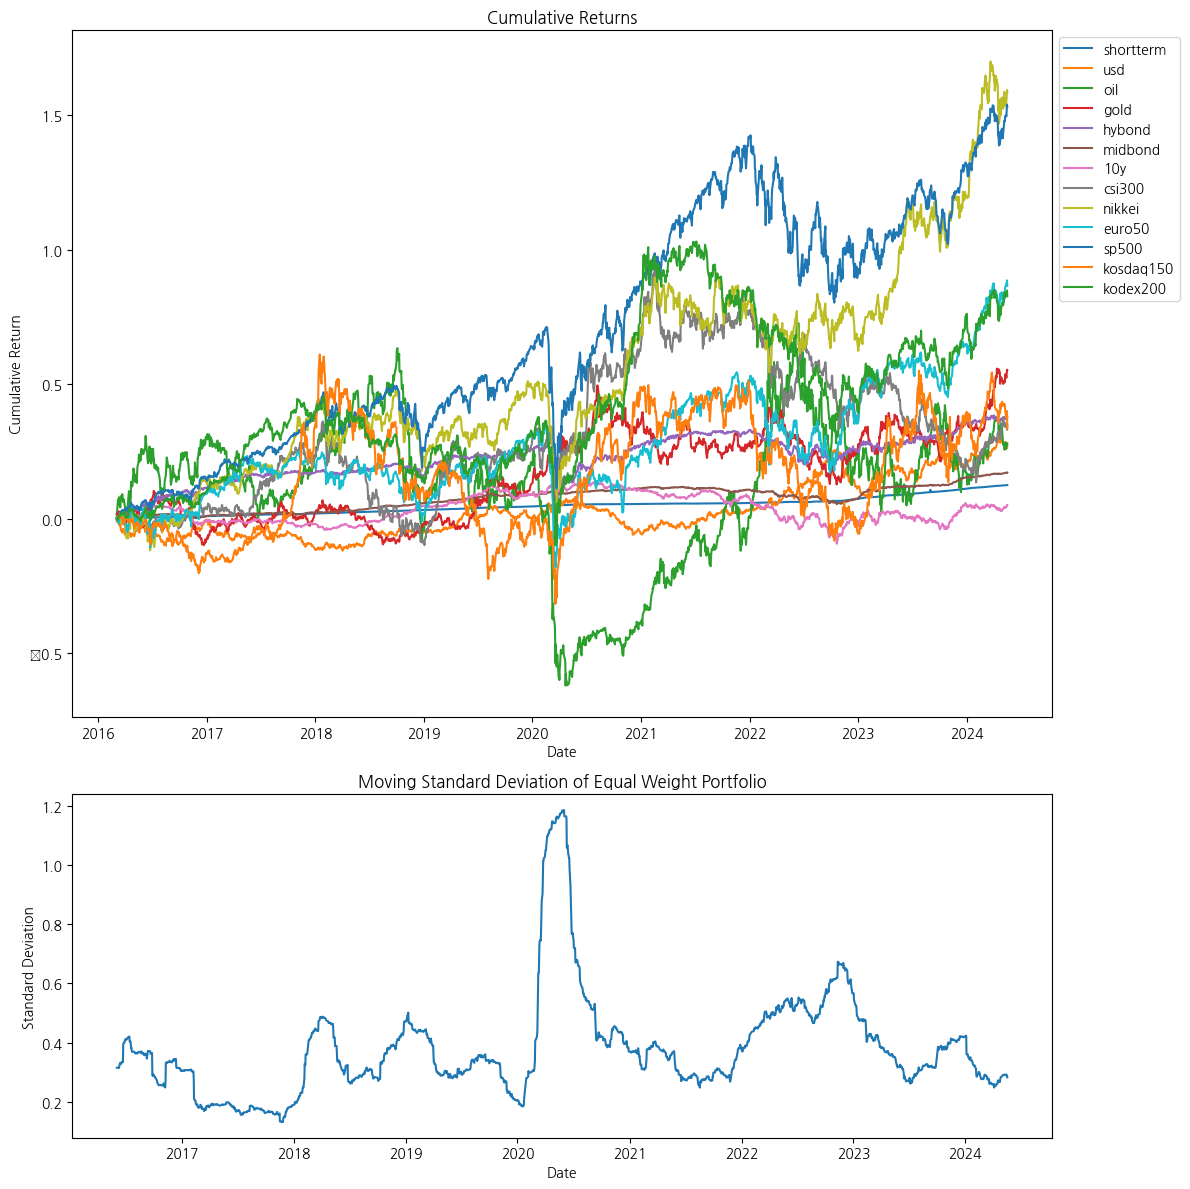

In [24]:
# Create a figure and two subplots with different height ratios
fig, axs = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 1]})  # First subplot twice the height of the second

# Plot cumulative returns on the first subplot
for column in cum_return_without_inverse_df.columns:
    axs[0].plot(cum_return_without_inverse_df.index, cum_return_without_inverse_df[column], label=column)

# Adjust the legend for the first subplot
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside the plot
axs[0].set_title('Cumulative Returns')  # Add title
axs[0].set_xlabel('Date')  # Add x-axis label
axs[0].set_ylabel('Cumulative Return')  # Add y-axis label

# Plot moving standard deviation on the second subplot
axs[1].plot(moving_std_of_equal_weight_port.index, moving_std_of_equal_weight_port)
axs[1].set_title('Moving Standard Deviation of Equal Weight Portfolio')  # Add title
axs[1].set_xlabel('Date')  # Add x-axis label
axs[1].set_ylabel('Standard Deviation')  # Add y-axis label

# Adjust layout to make room for the legend and prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [15]:
cum_return_df = (1 + return_df.loc['2024-01-01':] / 100).cumprod() - 1

In [16]:
cum_return_without_inverse_df =  cum_return_df[[col for col in cum_return_df.columns if 'inv' not in col]].copy()
cum_return_without_inverse_df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\chlje\AppData\Local\Temp\ipykernel_32380\1016612083.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # Adjust layout to make room for the legend
c:\Users\chlje\anaconda3\envs\sandbox311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


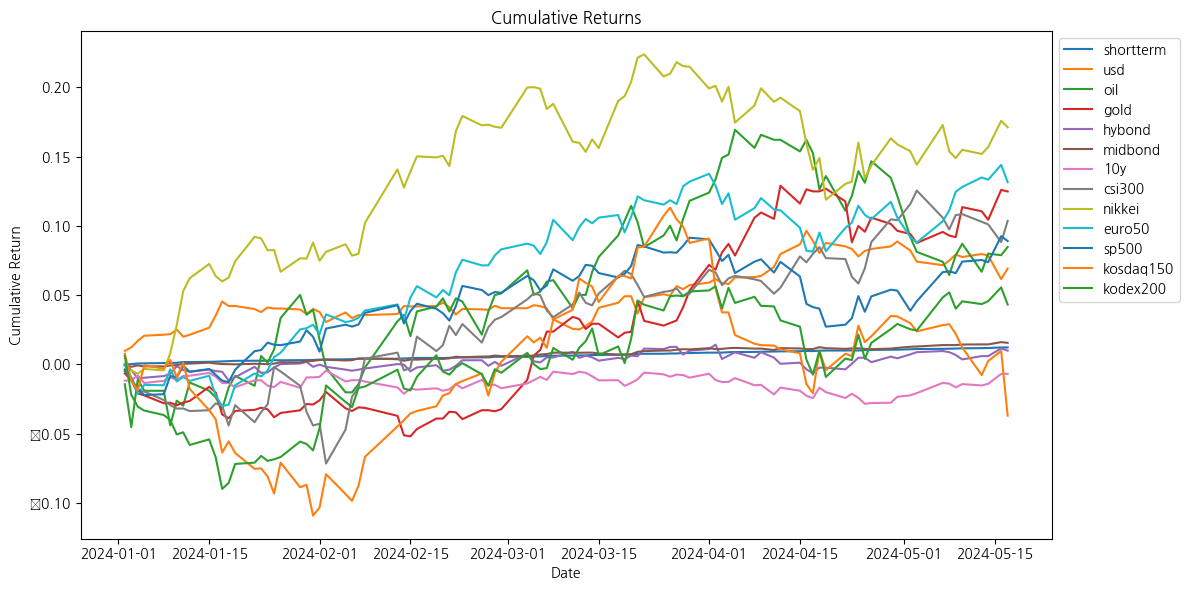

In [17]:
# Plot cumulative returns using matplotlib
plt.figure(figsize=(12, 6))  # Increase figure size

for column in cum_return_without_inverse_df.columns:
    plt.plot(cum_return_without_inverse_df.index, cum_return_without_inverse_df[column], label=column)

# Adjust the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside the plot

# Add title and labels if needed
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

## Corr

In [15]:
corr_df = return_df.corr()

In [16]:
return_without_inverse_df = return_df[[col for col in return_df.columns if 'inv' not in col]].copy()
sid_list_without_inverse = [sid for sid in sid_list if 'inv' not in sid]

C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2007796153.py:18: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2007796153.py:27: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2007796153.py:27: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2007796153.py:27: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

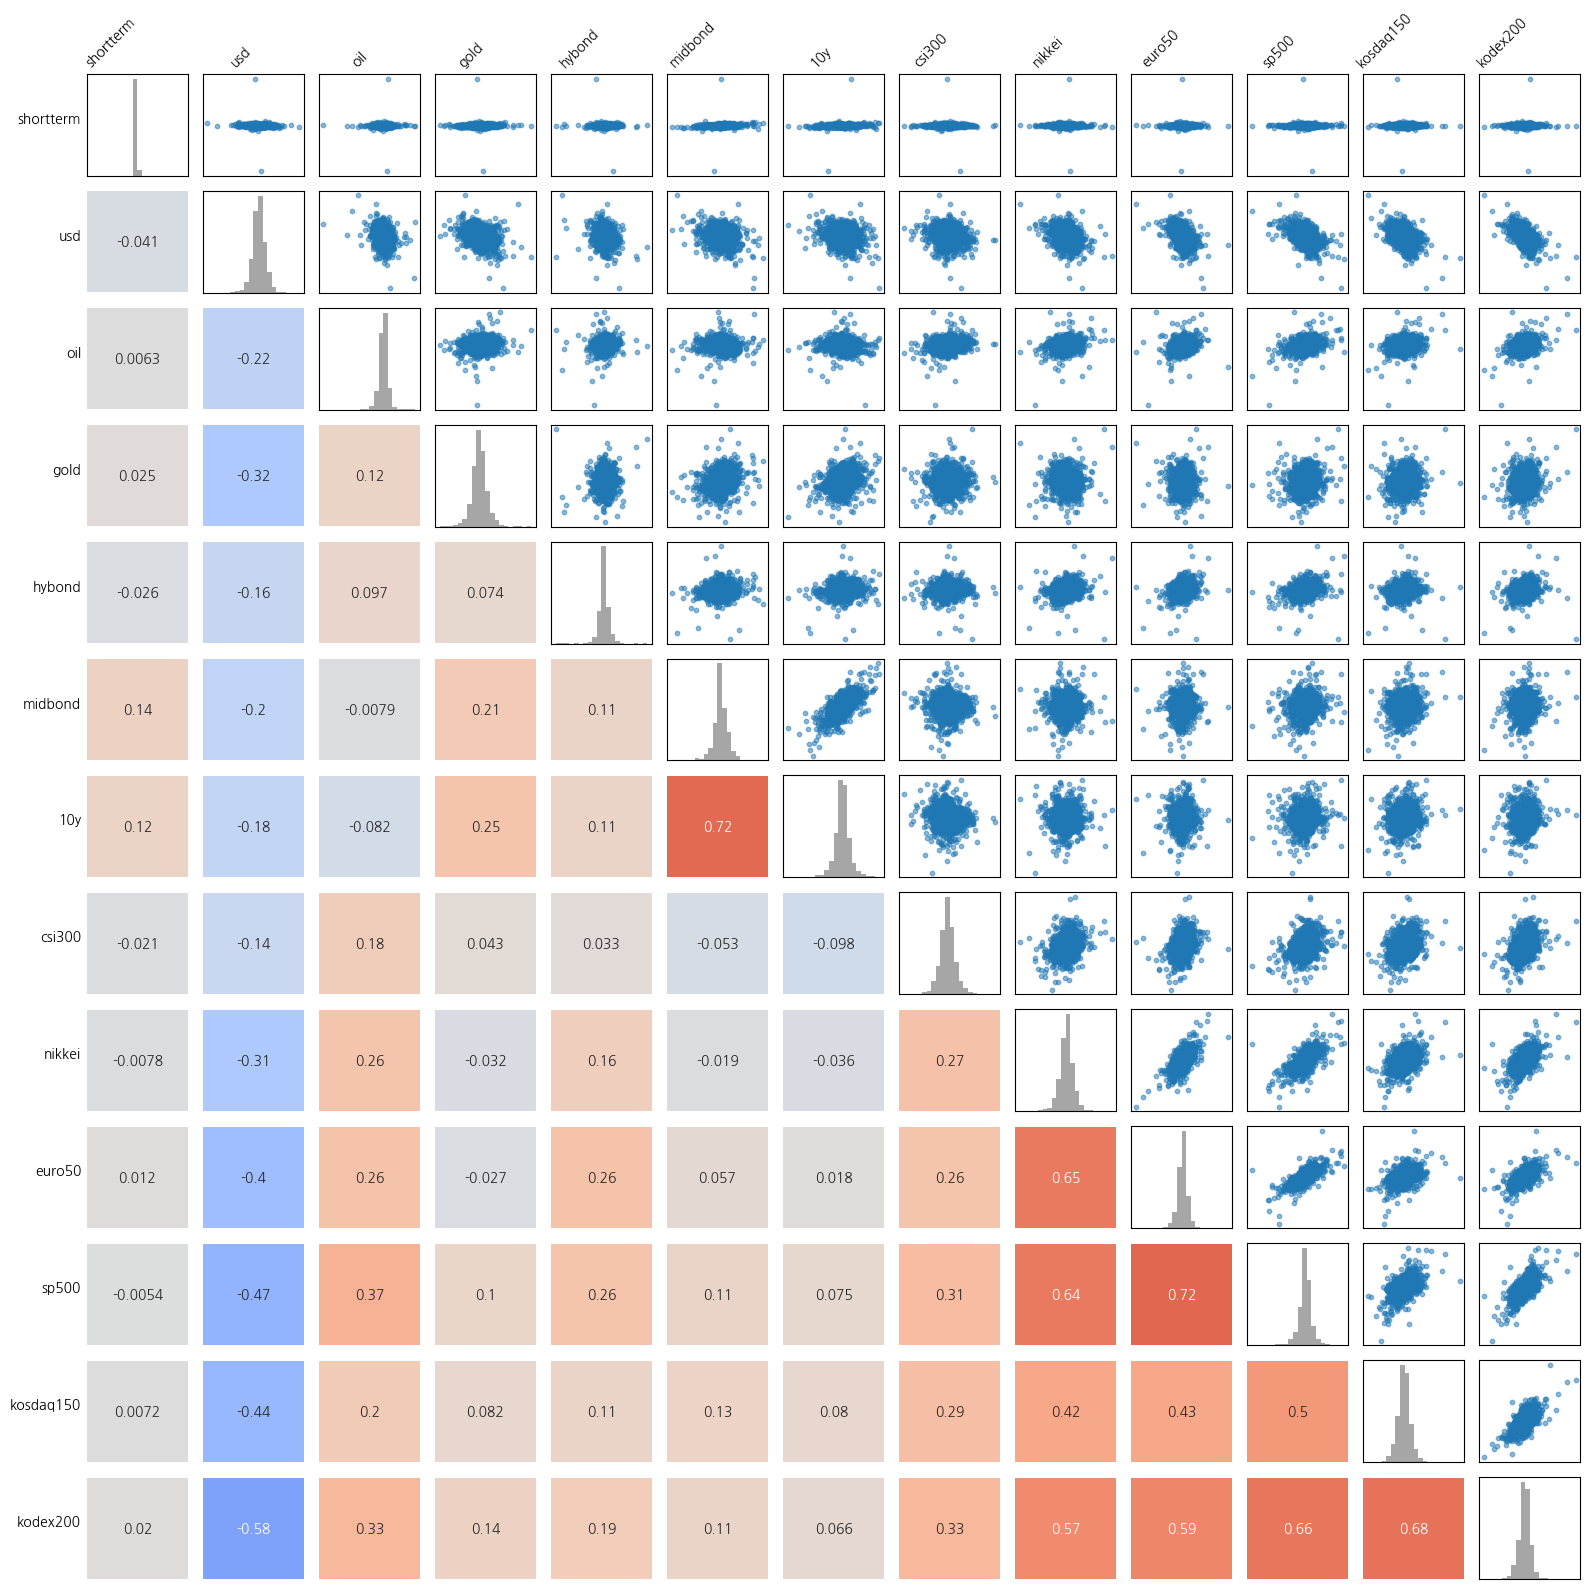

In [17]:
# Create a PairGrid-like plot using matplotlib
fig, axes = plt.subplots(nrows=len(sid_list_without_inverse), ncols=len(sid_list_without_inverse), figsize=(16, 16))

# Define a function to plot the lower triangle correlation heatmap with warning suppression
def plot_lower_triangle_heatmap(ax, data, x_col, y_col):
    with pd.option_context('mode.use_inf_as_na', True):
        corr = np.corrcoef(data[x_col], data[y_col])[0, 1]
        heatmap_data = np.array([[corr]])
        sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=True, cmap='coolwarm',
                    cbar=False, square=True, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

# Define a function to plot the diagonal histogram with warning suppression
def plot_diag_hist(ax, data, col):
    with pd.option_context('mode.use_inf_as_na', True):
        ax.hist(data[col], bins=20, color='gray', alpha=0.7)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

# Define a function to plot the upper triangle scatter plot with warning suppression
def plot_upper_triangle_scatter(ax, data, x_col, y_col):
    with pd.option_context('mode.use_inf_as_na', True):
        ax.scatter(data[x_col], data[y_col], alpha=0.5, s=10)  # s=10 makes the scatter plot points smaller
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

# Plot the data
for i in range(len(sid_list_without_inverse)):
    for j in range(len(sid_list_without_inverse)):
        ax = axes[i, j]
        if i > j:
            plot_lower_triangle_heatmap(ax, return_without_inverse_df, sid_list_without_inverse[j], sid_list_without_inverse[i])
        elif i == j:
            plot_diag_hist(ax, return_without_inverse_df, sid_list_without_inverse[i])
        elif i < j:
            plot_upper_triangle_scatter(ax, return_without_inverse_df, sid_list_without_inverse[j], sid_list_without_inverse[i])

# Add x-axis and y-axis labels for the entire plot
for ax, col in zip(axes[0], sid_list_without_inverse):
    ax.set_title(col, rotation=45, ha='right', fontsize=10)
for ax, row in zip(axes[:,0], sid_list_without_inverse):
    ax.set_ylabel(row, rotation=0, ha='right', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
return_without_inverse_ytd_df = return_without_inverse_df.loc['2024-01-01':, :]
sid_list_without_inverse = [sid for sid in sid_list if 'inv' not in sid]

C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2423415806.py:18: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2423415806.py:27: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2423415806.py:27: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chlje\AppData\Local\Temp\ipykernel_37660\2423415806.py:27: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

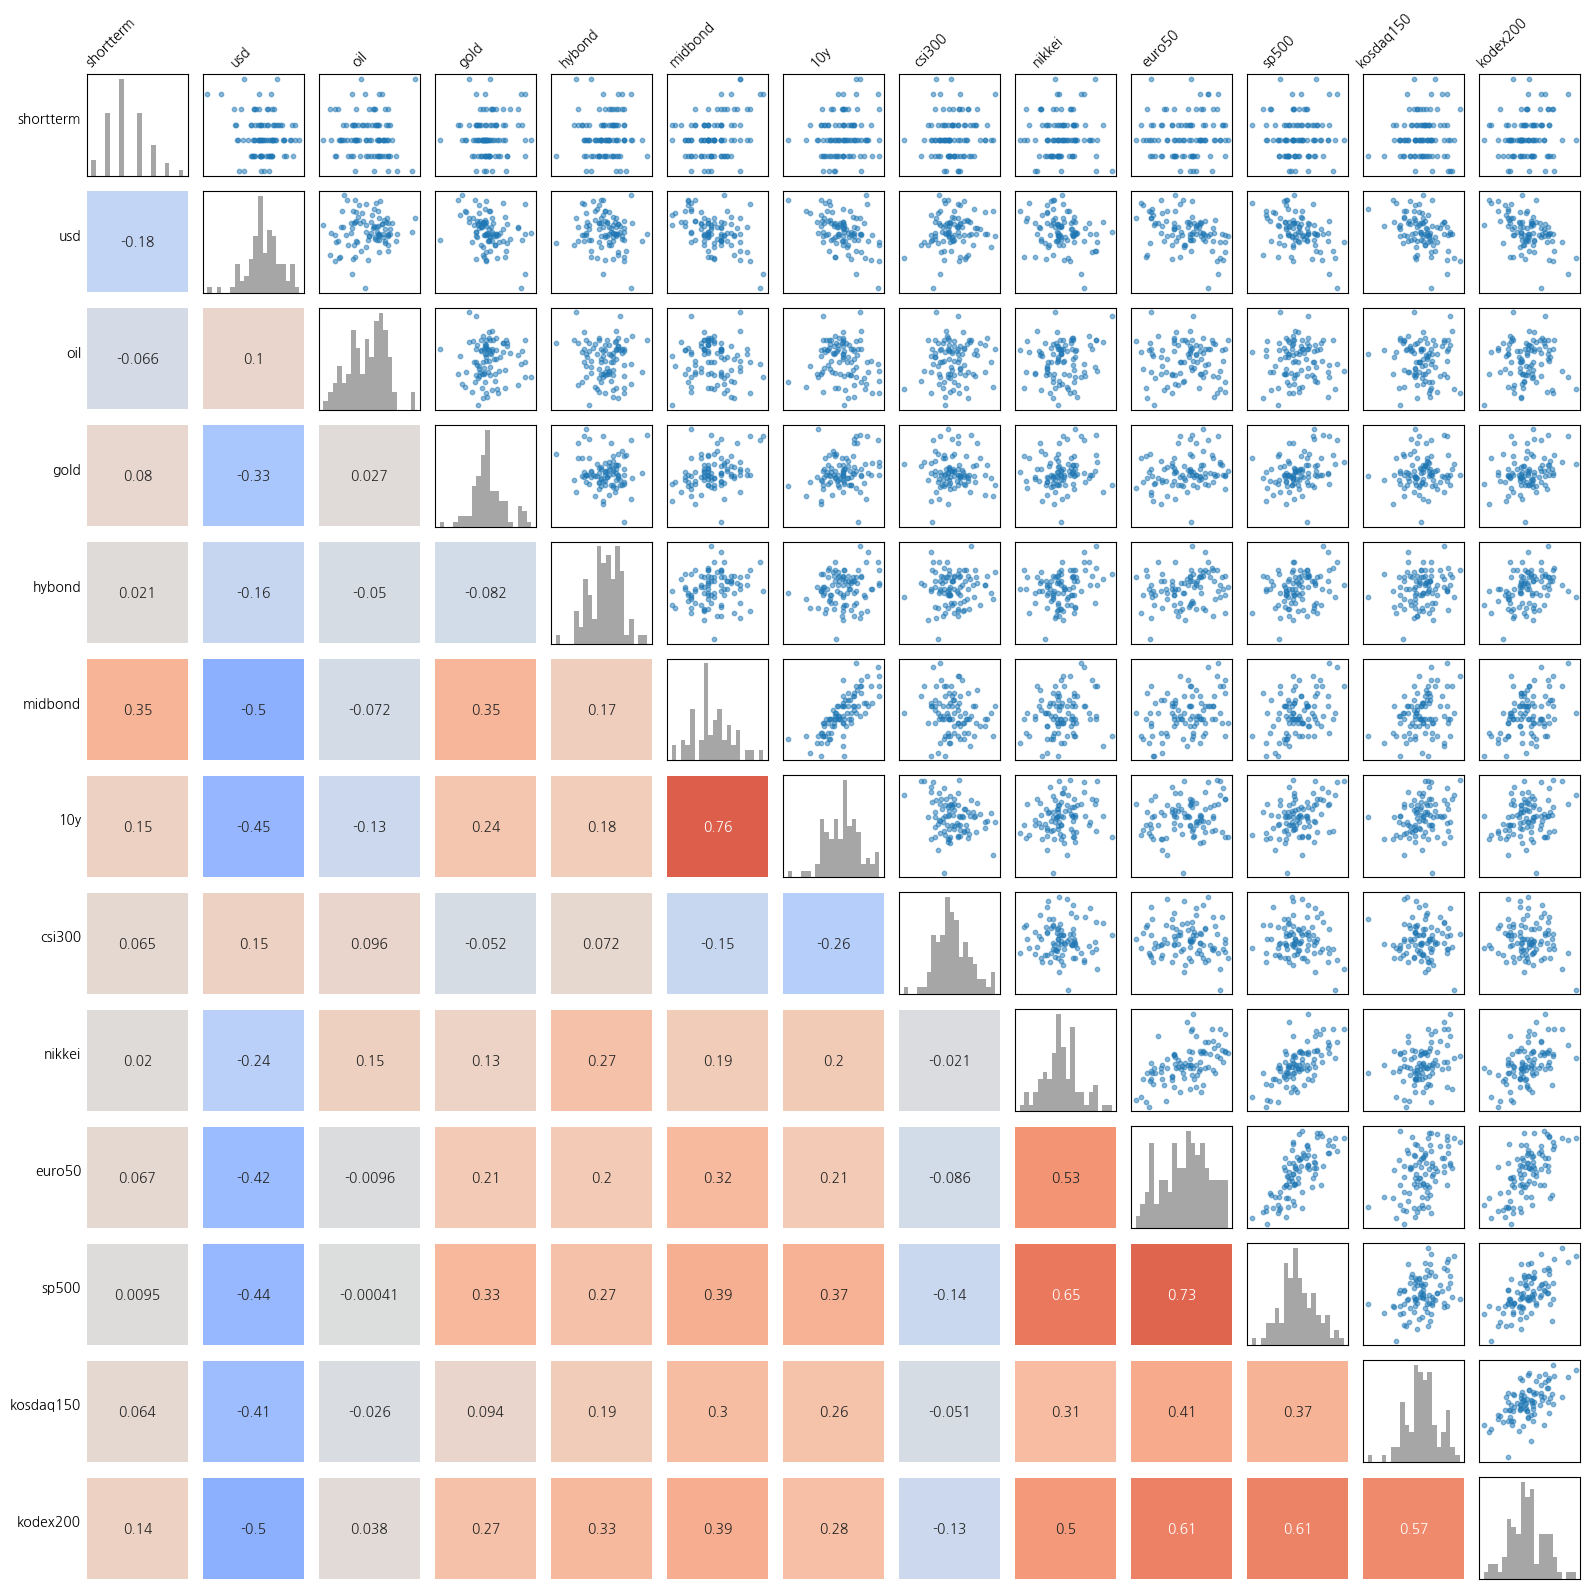

In [19]:
# Create a PairGrid-like plot using matplotlib
fig, axes = plt.subplots(nrows=len(sid_list_without_inverse), ncols=len(sid_list_without_inverse), figsize=(16, 16))

# Define a function to plot the lower triangle correlation heatmap with warning suppression
def plot_lower_triangle_heatmap(ax, data, x_col, y_col):
    with pd.option_context('mode.use_inf_as_na', True):
        corr = np.corrcoef(data[x_col], data[y_col])[0, 1]
        heatmap_data = np.array([[corr]])
        sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=True, cmap='coolwarm',
                    cbar=False, square=True, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

# Define a function to plot the diagonal histogram with warning suppression
def plot_diag_hist(ax, data, col):
    with pd.option_context('mode.use_inf_as_na', True):
        ax.hist(data[col], bins=20, color='gray', alpha=0.7)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

# Define a function to plot the upper triangle scatter plot with warning suppression
def plot_upper_triangle_scatter(ax, data, x_col, y_col):
    with pd.option_context('mode.use_inf_as_na', True):
        ax.scatter(data[x_col], data[y_col], alpha=0.5, s=10)  # s=10 makes the scatter plot points smaller
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

# Plot the data
for i in range(len(sid_list_without_inverse)):
    for j in range(len(sid_list_without_inverse)):
        ax = axes[i, j]
        if i > j:
            plot_lower_triangle_heatmap(ax, return_without_inverse_ytd_df, sid_list_without_inverse[j], sid_list_without_inverse[i])
        elif i == j:
            plot_diag_hist(ax, return_without_inverse_ytd_df, sid_list_without_inverse[i])
        elif i < j:
            plot_upper_triangle_scatter(ax, return_without_inverse_ytd_df, sid_list_without_inverse[j], sid_list_without_inverse[i])

# Add x-axis and y-axis labels for the entire plot
for ax, col in zip(axes[0], sid_list_without_inverse):
    ax.set_title(col, rotation=45, ha='right', fontsize=10)
for ax, row in zip(axes[:,0], sid_list_without_inverse):
    ax.set_ylabel(row, rotation=0, ha='right', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

# GPT EDA


## Multivariate GARCH

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from arch.covariance import DynamicConditionalCorrelation

# Fit univariate GARCH(1,1) models to each return series in return_df
garch_models = [arch_model(return_df[col], vol='Garch', p=1, q=1).fit(disp='off') for col in return_df.columns]

# Extract the standardized residuals and fit the DCC model
standardized_residuals = np.array([model.std_resid for model in garch_models]).T

# Initialize and fit the DCC model
dcc = DynamicConditionalCorrelation()
dcc.fit(standardized_residuals)

# Obtain the time-varying correlation matrices
time_varying_corr = dcc.corr_

# Compute the average correlation over time
avg_corr_series_dcc = [np.mean(np.triu(time_varying_corr[:, :, i], 1)) for i in range(time_varying_corr.shape[2])]

# Plot the average dynamic conditional correlation over time
plt.figure(figsize=(12, 6))
plt.plot(return_df.index, avg_corr_series_dcc, label='Average Dynamic Conditional Correlation')
plt.title('Average Dynamic Conditional Correlation Over Time')
plt.xlabel('Date')
plt.ylabel('Average DCC')
plt.legend()
plt.show()

print(f'Average Dynamic Conditional Correlation: {np.mean(avg_corr_series_dcc)}')


ImportError: cannot import name 'DynamicConditionalCorrelation' from 'arch.covariance' (c:\Users\chlje\anaconda3\envs\sandbox311\Lib\site-packages\arch\covariance\__init__.py)

c:\Users\chlje\anaconda3\envs\sandbox311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chlje\anaconda3\envs\sandbox311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006231. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\chlje\anaconda3\envs\sandbox311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008267. Parameter
estim

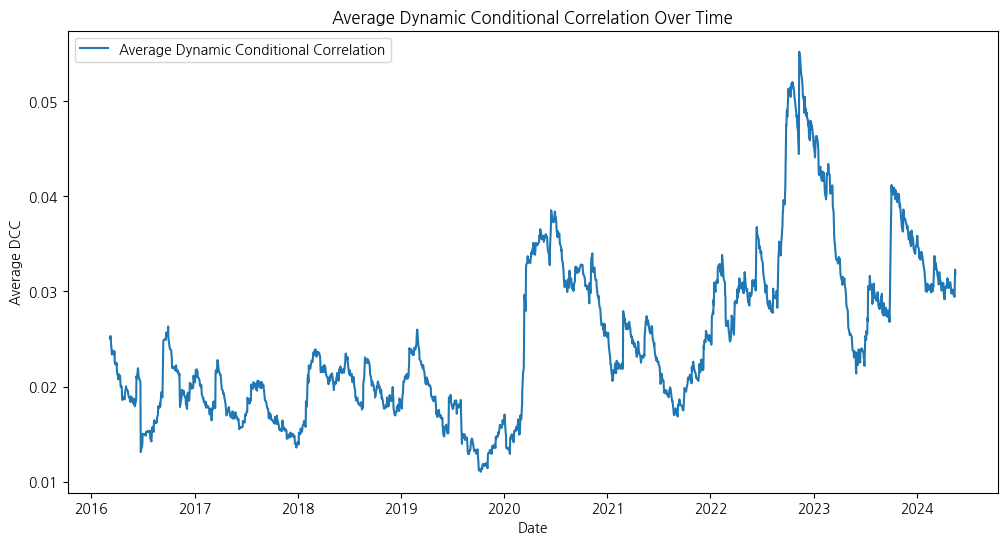

Average Dynamic Conditional Correlation: 0.024852323515152666


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from arch import arch_model
from scipy.optimize import minimize

# Step 1: Fit a VAR model to the returns
var_model = VAR(return_df)
var_results = var_model.fit(maxlags=1, ic='aic')

# Step 2: Extract residuals from the VAR model
residuals = var_results.resid

# Step 3: Fit univariate GARCH(1,1) models to each residual series
garch_models = [arch_model(residuals[col], vol='Garch', p=1, q=1).fit(disp='off') for col in residuals.columns]

# Step 4: Extract standardized residuals
standardized_residuals = np.array([model.std_resid for model in garch_models]).T

# Step 5: Define functions to estimate DCC parameters
def dcc_loss(params, resids):
    T, N = resids.shape
    a, b = params
    Qbar = np.cov(resids.T)
    Qt = Qbar
    likelihoods = []

    for t in range(T):
        Qt = (1 - a - b) * Qbar + a * np.outer(resids[t], resids[t]) + b * Qt
        Rt = np.linalg.inv(np.diag(np.sqrt(np.diag(Qt)))) @ Qt @ np.linalg.inv(np.diag(np.sqrt(np.diag(Qt))))
        likelihoods.append(-np.log(np.linalg.det(Rt)) - resids[t].T @ np.linalg.inv(Rt) @ resids[t])

    return -np.sum(likelihoods)

# Step 6: Estimate DCC parameters using scipy's minimize function
initial_params = np.array([0.01, 0.98])
dcc_params = minimize(dcc_loss, initial_params, args=(standardized_residuals,), bounds=[(0,1), (0,1)])
a, b = dcc_params.x

# Step 7: Calculate time-varying correlations
T, N = standardized_residuals.shape
Qbar = np.cov(standardized_residuals.T)
Qt = Qbar
time_varying_corr = np.zeros((N, N, T))

for t in range(T):
    Qt = (1 - a - b) * Qbar + a * np.outer(standardized_residuals[t], standardized_residuals[t]) + b * Qt
    Rt = np.linalg.inv(np.diag(np.sqrt(np.diag(Qt)))) @ Qt @ np.linalg.inv(np.diag(np.sqrt(np.diag(Qt))))
    time_varying_corr[:, :, t] = Rt

# Step 8: Compute the average correlation over time
avg_corr_series_dcc = [np.mean(np.triu(time_varying_corr[:, :, t], 1)) for t in range(T)]

# Step 9: Plot the average dynamic conditional correlation over time
plt.figure(figsize=(12, 6))
plt.plot(return_df.index[1:], avg_corr_series_dcc, label='Average Dynamic Conditional Correlation')
plt.title('Average Dynamic Conditional Correlation Over Time')
plt.xlabel('Date')
plt.ylabel('Average DCC')
plt.legend()
plt.show()

print(f'Average Dynamic Conditional Correlation: {np.mean(avg_corr_series_dcc)}')
